In [1]:
using Pkg
Pkg.activate("../")

using Base.Filesystem

# This is to read wav files.
# See: https://github.com/dancasimiro/WAV.jl
using WAV

using Plots
pyplot()

using Revise
using SpeechFeatures
using FFTW 
using PaddedViews

 Activating environment at `~/GithubRepositories/SpeechFeatures/Project.toml`
┌ Info: Precompiling SpeechFeatures [6f3487c4-5ca2-4050-bfeb-2cf56df92307]
└ @ Base loading.jl:1260


Download an example audio file from the TIMIT corpus.

In [5]:
if ! isfile("LDC93S1.wav")
    run(`wget https://catalog.ldc.upenn.edu/desc/addenda/LDC93S1.wav`)
end

Load the audio file

sampling freq: 16000.0 Hz
duration: 2.92 s


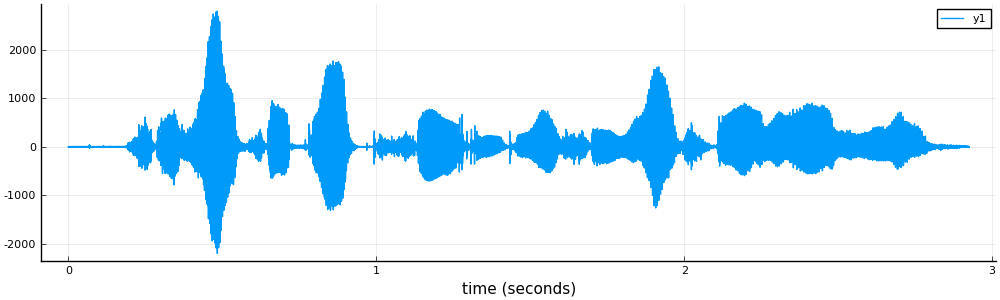

In [7]:
# The "native" option get the data in int16 type. 
# Reading the data in "double" format maybe cause 
# some problems later with the "dithering" parameter.
channels, srate = wavread("LDC93S1.wav", format="native")

# TIMIT data has only one channel (i.e. "mono") 
x = channels[:, 1]

println("sampling freq: $srate Hz\nduration: $(round(length(x) / srate, digits=2)) s")

t = range(0, length(x) / srate, length=length(x))
plot(t, x, size=(1000, 300), xlabel="time (seconds)")

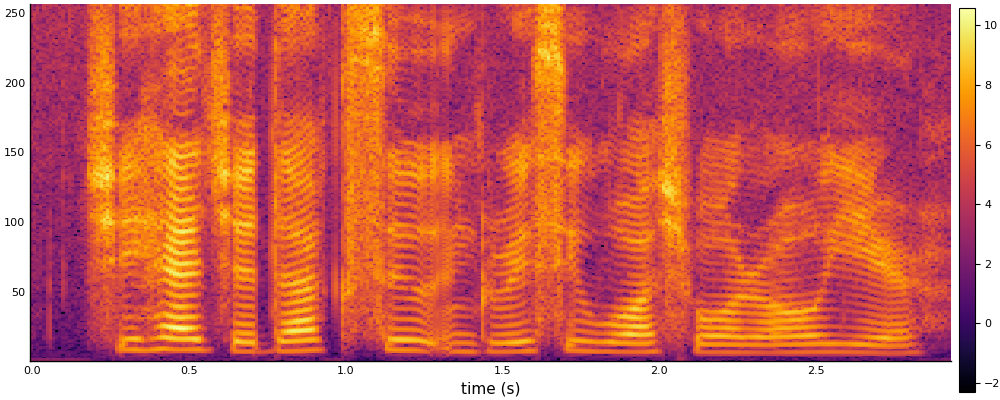

In [19]:
conf = Dict(
    # STFT config
    :fftlen => 512,
    :srate => 16000,
    :frameduration => 0.025,
    :framestep => 0.01,
    :removedc => true,
    :preemphasis => 0.97,
    :dithering => 1.,
    :windowfn => hann,
    :windowpower => 1.0,
)

fea = LogMagnitudeSpectrum(x; conf...)

heatmap(
    Vector(range(0, length(x) / srate, length=size(S, 2))),
    1:size(fea, 1),
    fea,
    size = (1000, 400),
    xlabel = "time (s)",
    clim = (log(0.1), Inf)
)

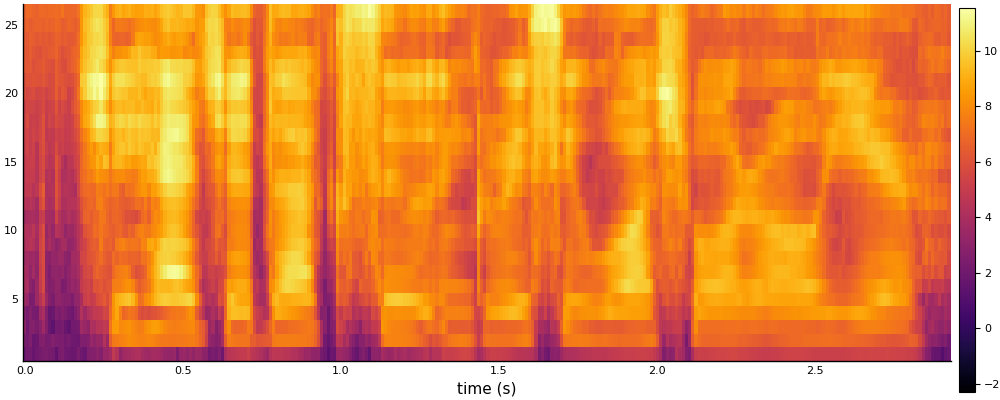

In [18]:
conf = Dict(
    # STFT config
    :fftlen => 512,
    :srate => 16000,
    :frameduration => 0.025,
    :framestep => 0.01,
    :removedc => true,
    :preemphasis => 0.97,
    :dithering => 1.,
    :windowfn => hann,
    :windowpower => 1.0,
    
    # FBANK config
    :nfilters => 26,
    :lofreq => 80,
    :hifreq => 8000
)

fea = LogMelSpectrum(x; conf...)

heatmap(
    Vector(range(0, length(x) / srate, length=size(S, 2))),
    1:size(fea, 1),
    fea,
    size = (1000, 400),
    xlabel = "time (s)",
    clim = (log(0.1), Inf)
)